In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import math
from scipy.stats import norm
import PublicFunctions as pf

# Read & draw activity-on-arc network for the project

Read the tasks of the project.

In [2]:
tasks, predenceRelationships, network = pf.ReadTasksAndCreateProjectNetwork()

The tasks are:

In [3]:
tasks

,Description,Predecessors
Task,,
1,Home plan design,NaN
2,Contracting,1
3,Permitting,1
4,Establishing temporary power to the site,"2, 3"
5,Site preparation,4
6,Pre-foundation rough plumbing,5
7,Pre-foundation inspection,6
8,Foundation,7
9,Framing,8


In [4]:
print("Precedence relationships:",predenceRelationships)

Precedence relationships: [(1, 2), (1, 3), (2, 4), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (10, 13), (10, 14), (14, 15), (14, 16), (12, 17), (13, 17), (15, 17), (16, 17), (17, 18), (18, 19), (19, 20), (19, 21), (17, 22), (19, 23), (19, 24), (19, 25), (25, 26), (25, 27), (19, 28), (20, 29), (21, 29), (27, 29), (28, 29), (22, 30), (23, 30), (24, 30), (26, 30), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34)]


The project [activity-on-node] network:

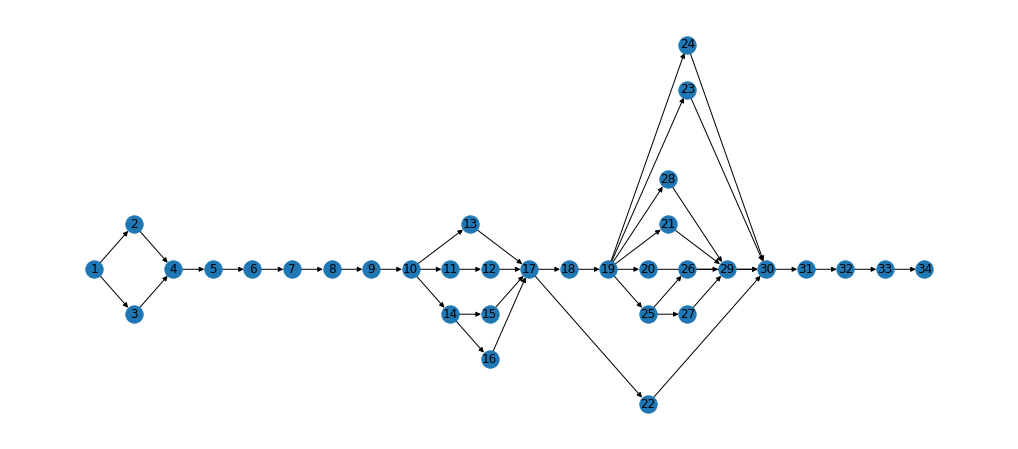

In [5]:
fig, ax = plt.subplots(1,1,figsize = (18, 8))
nx.draw(network, nx.get_node_attributes(network,'pos'), with_labels=True)
plt.show()

# The probabilistic project

There are 95 past projects with given actual duration data for each of the 34 tasks.

In [6]:
allDurations = pd.read_csv('PastDurations.csv')
allDurations

,Project ID,Task,Duration
0,0,1,16
1,0,2,5
2,0,3,9
3,0,4,2
4,0,5,4
...,...,...,...
3225,94,30,11
3226,94,31,14
3227,94,32,26
3228,94,33,4


In [7]:
projectIDs = pd.unique(allDurations['Project ID'])

We reorganize the task durations data into a two-way table in preparation for statistical analyses.

In [8]:
durations_twoWayTable = pd.DataFrame(index = projectIDs)
for i in allDurations.index:
    row = allDurations.iloc[i]
    durations_twoWayTable.loc[row['Project ID'],row['Task']] = row['Duration']
durations_twoWayTable

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,16.0,5.0,9.0,2.0,4.0,6.0,16.0,15.0,16.0,6.0,...,22.0,11.0,5.0,19.0,12.0,7.0,13.0,12.0,9.0,8.0
1,17.0,7.0,8.0,2.0,7.0,4.0,8.0,9.0,15.0,14.0,...,18.0,7.0,4.0,14.0,10.0,5.0,9.0,12.0,5.0,10.0
2,16.0,5.0,11.0,3.0,5.0,3.0,7.0,15.0,10.0,7.0,...,17.0,10.0,4.0,16.0,12.0,8.0,11.0,15.0,4.0,12.0
3,20.0,8.0,10.0,2.0,5.0,4.0,10.0,16.0,14.0,10.0,...,18.0,11.0,3.0,16.0,13.0,2.0,12.0,15.0,6.0,11.0
4,14.0,8.0,13.0,3.0,4.0,3.0,9.0,10.0,12.0,7.0,...,29.0,6.0,8.0,19.0,7.0,11.0,7.0,26.0,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,23.0,8.0,10.0,2.0,4.0,4.0,14.0,5.0,13.0,10.0,...,29.0,4.0,5.0,13.0,10.0,8.0,12.0,11.0,6.0,8.0
91,19.0,6.0,11.0,9.0,5.0,6.0,8.0,13.0,8.0,9.0,...,19.0,13.0,4.0,22.0,14.0,4.0,10.0,13.0,5.0,12.0
92,14.0,9.0,9.0,3.0,4.0,4.0,18.0,13.0,18.0,8.0,...,28.0,11.0,6.0,14.0,13.0,3.0,11.0,21.0,4.0,10.0
93,18.0,6.0,10.0,3.0,8.0,4.0,5.0,7.0,14.0,7.0,...,16.0,10.0,6.0,13.0,10.0,4.0,15.0,12.0,8.0,7.0


Now we calculate descriptive statistics individually on each task.

In [9]:
descriptiveStats = durations_twoWayTable.describe()
descriptiveStats

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,15.357895,6.231579,10.621053,4.063158,5.673684,4.263158,10.557895,11.010526,15.136842,8.757895,...,22.631579,10.168421,4.421053,16.231579,12.094737,7.126316,11.378947,15.547368,5.515789,9.884211
std,3.316355,1.771240,1.739277,2.225627,1.734764,1.186901,3.296406,2.951721,4.365266,2.916263,...,5.611638,2.611972,1.568160,3.243496,2.935743,2.678687,2.568959,4.653455,2.182440,1.767696
min,8.000000,3.000000,5.000000,1.000000,3.000000,2.000000,4.000000,5.000000,5.000000,4.000000,...,14.000000,3.000000,2.000000,7.000000,5.000000,2.000000,6.000000,6.000000,2.000000,6.000000
25%,13.000000,5.000000,10.000000,2.000000,4.000000,3.500000,8.000000,9.000000,12.000000,7.000000,...,18.000000,9.000000,3.000000,14.000000,10.000000,5.000000,10.000000,12.000000,4.000000,8.000000
50%,15.000000,6.000000,11.000000,3.000000,5.000000,4.000000,10.000000,10.000000,15.000000,8.000000,...,21.000000,10.000000,4.000000,16.000000,12.000000,7.000000,11.000000,15.000000,5.000000,10.000000
75%,18.000000,7.000000,12.000000,5.000000,7.000000,5.000000,13.000000,13.000000,18.000000,10.000000,...,27.500000,12.000000,5.000000,19.000000,14.000000,9.000000,13.000000,19.000000,7.000000,11.000000
max,24.000000,11.000000,14.000000,10.000000,12.000000,9.000000,20.000000,18.000000,27.000000,19.000000,...,37.000000,17.000000,10.000000,24.000000,19.000000,13.000000,17.000000,26.000000,10.000000,14.000000


In [10]:
probabilisticProject = tasks[['Predecessors']]
probabilisticProject['Duration']=descriptiveStats.loc['mean'].transpose()
probabilisticProject['Std. Dev.']=descriptiveStats.loc['std'].transpose()
probabilisticProject

,Predecessors,Duration,Std. Dev.
Task,,,
1,NaN,15.357895,3.316355
2,1,6.231579,1.771240
3,1,10.621053,1.739277
4,"2, 3",4.063158,2.225627
5,4,5.673684,1.734764
6,5,4.263158,1.186901
7,6,10.557895,3.296406
8,7,11.010526,2.951721
9,8,15.136842,4.365266


Solve the project via CPM.

In [11]:
critical_nodes_p, makespan_p, data_dict_p = pf.determine_critical_path(probabilisticProject)
print("Critical nodes:",critical_nodes_p)

Critical nodes: [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 18, 19, 25, 27, 29, 30, 31, 32, 33, 34]


In [12]:
print("Expected project completion time (makespan):",makespan_p)

Expected project completion time (makespan): 258.0105263157895


In [13]:
pct_var = 100#Must change this
print("Project completion time variance:",pct_var)

Project completion time variance: 100


In [14]:
pct_std = 10#Must change this
print("Project completion time standard deviation:",pct_std)

Project completion time standard deviation: 10


In [15]:
#Calculate the project completion time to quote for 95% probability of timely completion

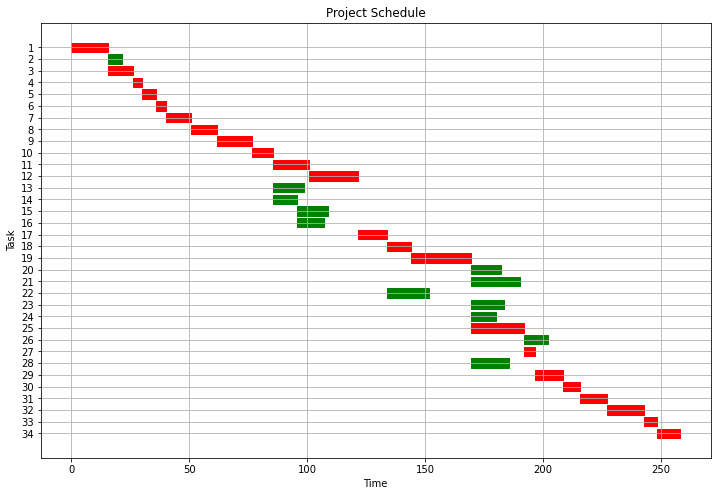

In [16]:
gc_p = pf.DrawGanttChart(data_dict_p, critical_nodes_p)
plt.show()

# The team's actual [past] project

In [17]:
team = 0
deterministicProject = tasks[['Predecessors']]
deterministicProject['Duration']=pf.ReadTeamsDurations(team)['Duration']
deterministicProject

,Predecessors,Duration
Task,,
1,NaN,16
2,1,5
3,1,9
4,"2, 3",2
5,4,4
6,5,6
7,6,16
8,7,15
9,8,16


Solve the project via CPM.

In [18]:
critical_nodes_d, makespan_d, data_dict_d = pf.determine_critical_path(deterministicProject)
print("Critical nodes:",critical_nodes_d)

Critical nodes: [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 18, 19, 25, 27, 29, 30, 31, 32, 33, 34]


In [19]:
print("makespan:",makespan_d)

makespan: 271


Gantt chart for the project follows:

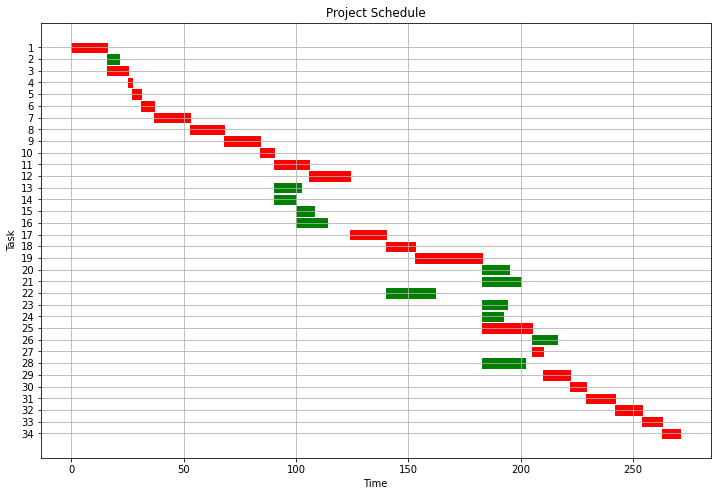

In [20]:
gc_d = pf.DrawGanttChart(data_dict_d, critical_nodes_d)
plt.show()

In [21]:
#List the critical tasks common between the deterministic and probabilistic projects

In [22]:
#List the tasks critical in the actual past project, but not in the probabilistic project

In [23]:
#Calculate the probability of completing a project as fast as the deterministic project was completed